In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [39]:
df = pd.read_csv('../raw_data/100_russel_3000.csv')

In [40]:
# Select columns
df = df[['symbol','Unnamed: 0', 'EBITDA', 'grossProfit', 'revenue', 'totalCash', 'totalDebt']]
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

In [41]:
# Convert into millions USD
df['EBITDA'] = df['EBITDA']/1_000_000
df['grossProfit'] = df['grossProfit']/1_000_000
df['revenue'] = df['revenue']/1_000_000
df['totalCash'] = df['totalCash']/1_000_000
df['totalDebt'] = df['totalDebt']/1_000_000

# Variable Distributions

## EBITDA

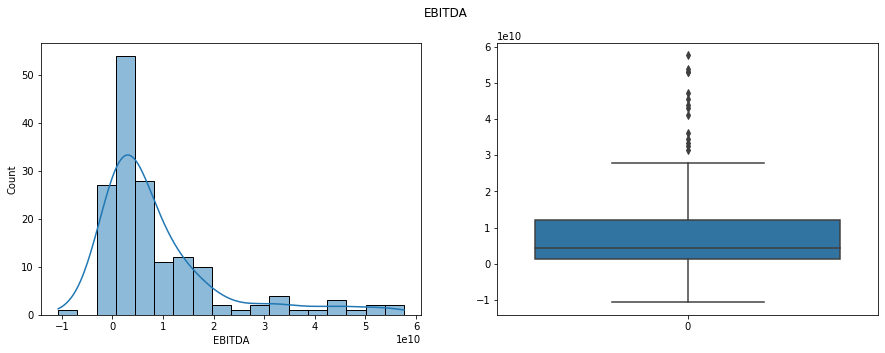

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['EBITDA'], kde=True, ax=axs[0])
sns.boxplot(data=df['EBITDA'], ax=axs[1])
fig.suptitle('EBITDA')
plt.show()

## Gross Profit

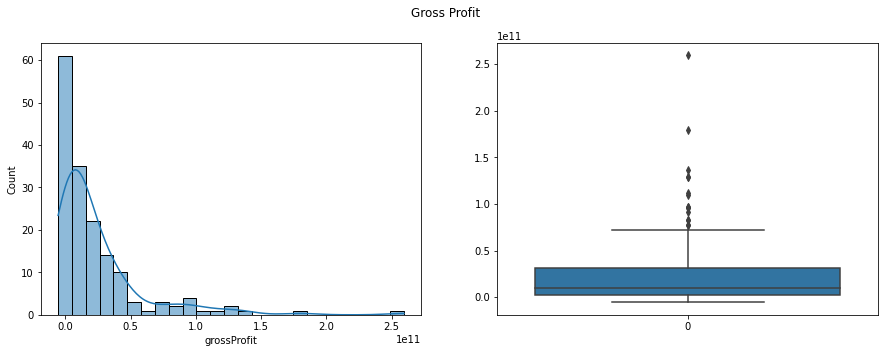

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['grossProfit'], kde=True, ax=axs[0])
sns.boxplot(data=df['grossProfit'], ax=axs[1])
fig.suptitle('Gross Profit')
plt.show()

## Revenue

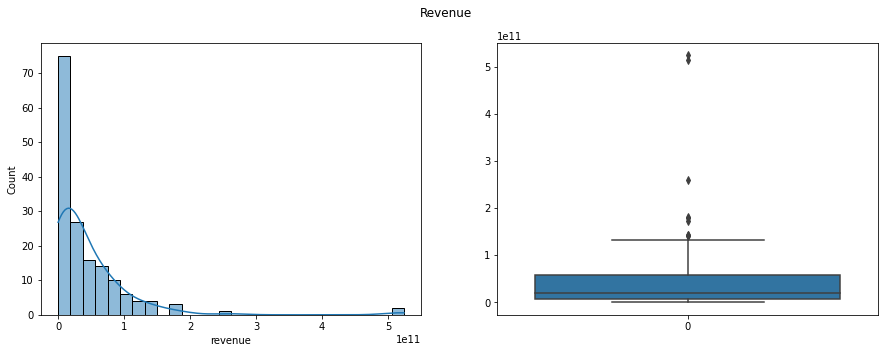

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['revenue'], kde=True, ax=axs[0])
sns.boxplot(data=df['revenue'], ax=axs[1])
fig.suptitle('Revenue')
plt.show()

## Total Cash

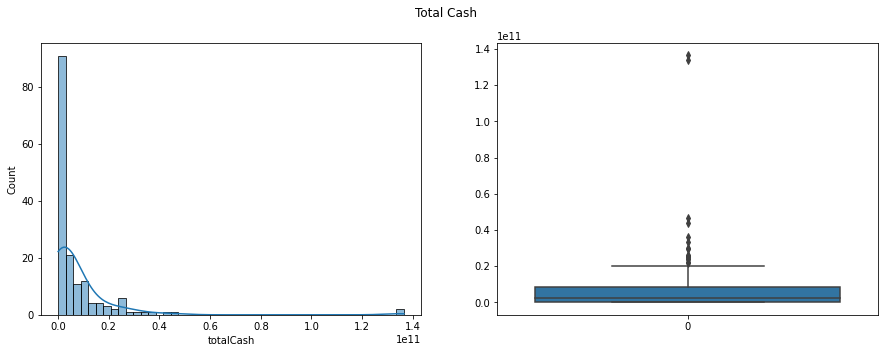

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['totalCash'], kde=True, ax=axs[0])
sns.boxplot(data=df['totalCash'], ax=axs[1])
fig.suptitle('Total Cash')
plt.show()

## Total Debt 

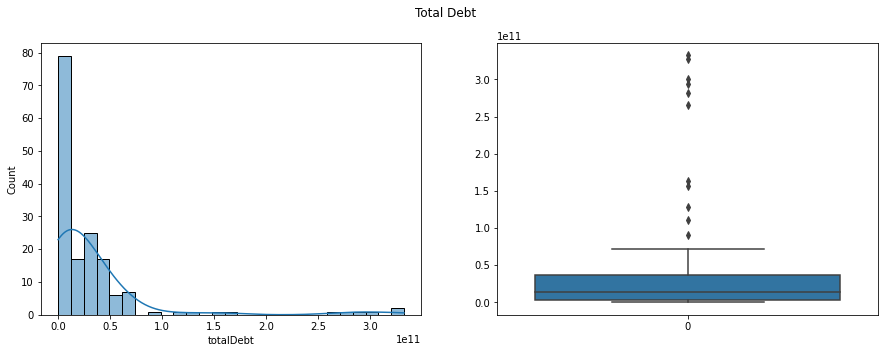

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['totalDebt'], kde=True, ax=axs[0])
sns.boxplot(data=df['totalDebt'], ax=axs[1])
fig.suptitle('Total Debt')
plt.show()

## CAGR

In [46]:
df['last_year_revenue'] = df['revenue'].shift(-1)

revenue_growth = df[df.reset_index()['index'] % 2 == 0].reset_index().drop(columns=['index'])

revenue_growth['cagr'] = 100 * (revenue_growth['revenue'] - revenue_growth['last_year_revenue'])/revenue_growth['last_year_revenue']

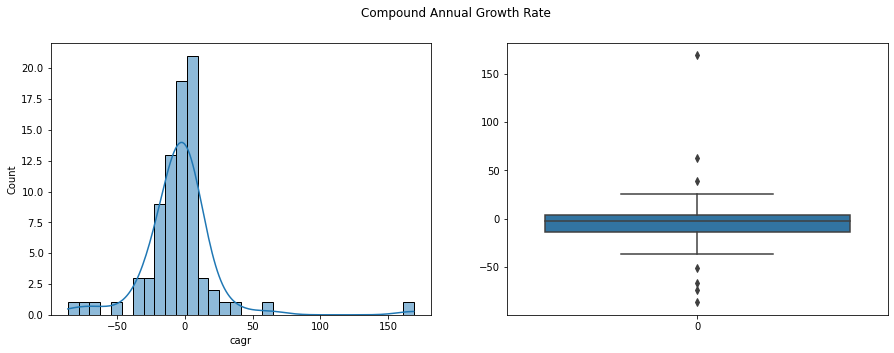

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(revenue_growth['cagr'], kde=True, ax=axs[0])
sns.boxplot(data=revenue_growth['cagr'], ax=axs[1])
fig.suptitle('Compound Annual Growth Rate')
plt.show()

# Correlations

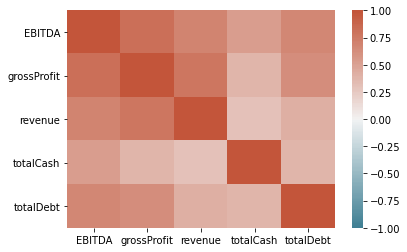

In [34]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(220, 20, n=200))
plt.show()

# Top 10s

## Growth

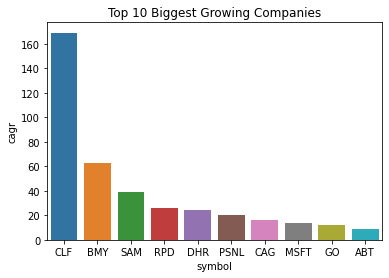

In [80]:
sns.barplot(x=revenue_growth.sort_values(by='cagr', ascending=False).head(10)['symbol'], y=revenue_growth.sort_values(by='cagr', ascending=False).head(10)['cagr'])
plt.title('Top 10 Biggest Growing Companies')
plt.show()

## Revenue

In [87]:
pre_covid = df[df.reset_index()['index'] % 2 != 0].reset_index().drop(columns=['index', 'last_year_revenue', 'cagr'])

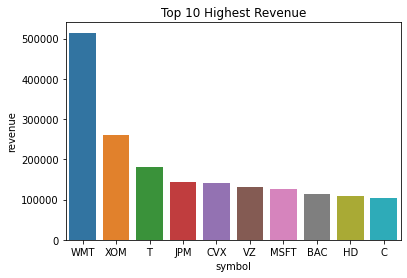

In [89]:
sns.barplot(x=pre_covid.sort_values(by='revenue', ascending=False).head(10)['symbol'], y=pre_covid.sort_values(by='revenue', ascending=False).head(10)['revenue'])
plt.title('Top 10 Highest Revenue')
plt.show()

## Profit

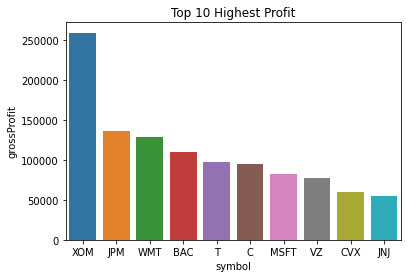

In [90]:
sns.barplot(x=pre_covid.sort_values(by='grossProfit', ascending=False).head(10)['symbol'], y=pre_covid.sort_values(by='grossProfit', ascending=False).head(10)['grossProfit'])
plt.title('Top 10 Highest Profit')
plt.show()

## Debt

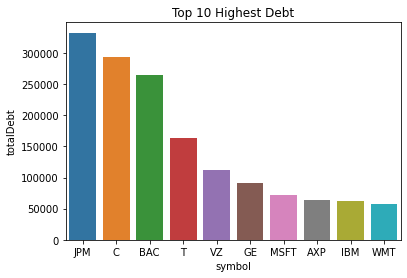

In [92]:
sns.barplot(x=pre_covid.sort_values(by='totalDebt', ascending=False).head(10)['symbol'], y=pre_covid.sort_values(by='totalDebt', ascending=False).head(10)['totalDebt'])
plt.title('Top 10 Highest Debt')
plt.show()